## **INSTALL LIBRALY**

In [ ]:
pip install mplfinance

In [ ]:
pip install mpl_finance

In [ ]:
pip install starfishX --upgrade

In [ ]:
pip install pandas_ta

In [ ]:
pip install colorama

## **IMPORT LIBRALY**

In [ ]:
import starfishX as sx
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import mplfinance as mpf
%matplotlib inline
from mpl_finance import candlestick2_ohlc
import numpy as np

# change color
import colorama
from colorama import Fore, Back, Style

## **SET_50 MEMBER**

In [ ]:
#SET member
SET_50 = ['ADVANC','AOT','BBL','BDMS','BEM','BGRIM','BH','BJC','BTS','CBG','COM7','CPALL','CPF','CPN','CRC','DELTA','DTAC','EA','EGCO','GLOBAL',
          'GPSC','GULF','HMPRO','INTUCH','IRPC','IVL','KBANK','KCE','KTB','KTC','LH','MINT','MTC','OR','OSP','PTT','PTTEP','PTTGC','RATCH','SAWAD',
          'SCB','SCC','SCGP','STA','STGT','TISCO','TOP','TRUE','TTB','TU']

## **INSERTION PART**

In [ ]:

# Insertion
def insertion_function(list,member): 
  array_member = member
  index = range(1, len(list))  
  for i in index:
    value_to_sort = list[i]
    
    while list[i-1] < value_to_sort and i>0:  
      list[i],list[i-1] = list[i-1],list[i]
      array_member[i],array_member[i-1] = array_member[i-1],array_member[i]
      i = i-1  
  
  return array_member, list


## **1. Function to exhibit graph**

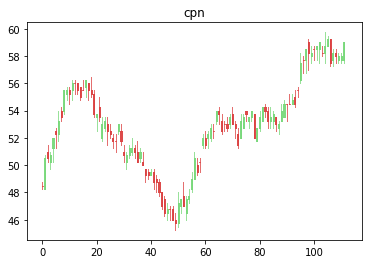

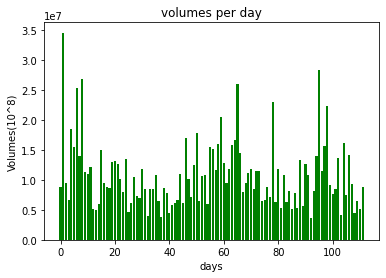

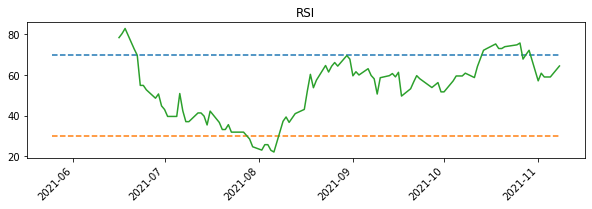

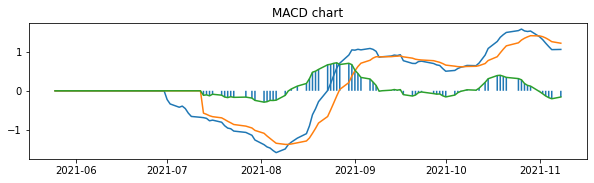

In [ ]:
##Function to Exhibit Graph

#Calculate#####

#MACD
def computeMACD (df, n_fast, n_slow, n_smooth):
    data = df['Adj Close']
    
    fastEMA = data.ewm(span=n_fast, min_periods=n_slow).mean()
    slowEMA = data.ewm(span=n_slow, min_periods=n_slow).mean()
    MACD = pd.Series(fastEMA-slowEMA, name = 'MACD')
    MACDsig = pd.Series(MACD.ewm(span=n_smooth, min_periods=n_smooth).mean(), name='MACDsig')
    MACDhist = pd.Series(MACD - MACDsig, name = 'MACDhist')
    df = df.join(MACD)
    df = df.join(MACDsig)
    df = df.join(MACDhist)
    
    return df

#RSI
def rsi(df, periods = 14, ema = True):

    close_delta = df['Close'].diff()

    # Make two series: one for lower closes and one for higher closes
    up = close_delta.clip(lower=0)
    down = -1 * close_delta.clip(upper=0)
    
    if ema == True:
	    # Use exponential moving average
        ma_up = up.ewm(com = periods - 1, adjust=True, min_periods = periods).mean()
        ma_down = down.ewm(com = periods - 1, adjust=True, min_periods = periods).mean()
    else:
        # Use simple moving average
        ma_up = up.rolling(window = periods, adjust=False).mean()
        ma_down = down.rolling(window = periods, adjust=False).mean()
        
    rsi = ma_up / ma_down
    rsi = 100 - (100/(1 + rsi))
    return rsi
#######

##PLOT###

def CandleGraph(member,Day_start,Day_end):
  
  nif = sx.loadHistData_v2(symbol=member , start=Day_start, end=Day_end)
  fg, ax1 = plt.subplots()
  cl = candlestick2_ohlc(ax=ax1,opens=nif['Open'],highs=nif['High'],lows=nif['Low'],closes=nif['Close'],width=0.4, colorup='#77d879', colordown='#db3f3f')
  plt.title(member)  
  plt.show()

def RsiGraph(df, periods = 14, ema = True):
    close_delta = df['Close'].diff()

    # Make two series: one for lower closes and one for higher closes
    up = close_delta.clip(lower=0)
    down = -1 * close_delta.clip(upper=0)
    
    if ema == True:
	    # Use exponential moving average
        ma_up = up.ewm(com = periods - 1, adjust=True, min_periods = periods).mean()
        ma_down = down.ewm(com = periods - 1, adjust=True, min_periods = periods).mean()
    else:
        # Use simple moving average
        ma_up = up.rolling(window = periods, adjust=False).mean()
        ma_down = down.rolling(window = periods, adjust=False).mean()
        
    rsi = ma_up / ma_down
    rsi = 100 - (100/(1 + rsi))
    plt.figure(figsize=(10,2.5))
    plt.title('RSI')
    #
    plt.plot(rsi.index, [70] * len(rsi.index), label="overbought",linestyle='dashed')
    plt.plot(rsi.index, [30] * len(rsi.index), label="oversold",linestyle='dashed')
    #
    plt.plot()
    plt.xticks(rotation=45, ha='right')
    plt.plot(rsi)
    

def MACDGraph(df, n_fast, n_slow, n_smooth):
    data = df['Adj Close']
    
    fastEMA = data.ewm(span=n_fast, min_periods=n_slow).mean()
    slowEMA = data.ewm(span=n_slow, min_periods=n_slow).mean()
    MACD = pd.Series(fastEMA-slowEMA, name = 'MACD')
    MACDsig = pd.Series(MACD.ewm(span=n_smooth, min_periods=n_smooth).mean(), name='MACDsig')
    MACDhist = pd.Series(MACD - MACDsig, name = 'MACDhist')
    df = df.join(MACD)
    df = df.join(MACDsig)
    df = df.join(MACDhist)  
    #plot graph
    plt.figure(figsize=(10,2.5))
    plt.title('MACD chart')
    plt.plot(df.index, df['MACD'].fillna(0))
    plt.plot(df.index, df['MACDsig'].fillna(0))
    plt.plot(df.index, df['MACDhist'].fillna(0))
    plt.bar(df.index, df['MACDhist'].fillna(0), width=0.5, snap=False)
    

def VolumeGraph(member):
  y = member['Volume']
  plt.title('volumes per day')
  plt.xlabel('days')
  plt.ylabel('Volumes(10^8)')
  plt.bar( range(len(y)), y, color='green')

    
####
def CreateGraph(member, Day_start, Day_end):
  Day_end = (pd.Timestamp(Day_end) + pd.DateOffset(days=1)).strftime('%Y-%m-%d')
  dtmember = sx.loadHistData_v2(symbol=member , start=Day_start, end=Day_end)
  CandleGraph(member,Day_start,Day_end)
  VolumeGraph(dtmember)
  RsiGraph(dtmember, periods = 14, ema = True)
  MACDGraph(dtmember, 12, 26, 9)
  

##Example Call
CreateGraph(member='cpn', Day_start= '2021-5-25', Day_end = '2021-11-8')

##**2. Scan by user condition**

In [ ]:
## Scan condition function
def RSIandMACDcondition( member, Day_end, RSI_want_LOW, RSI_want_HIGH, MACD_want_morethan):
  
  Day_start = (pd.Timestamp(Day_end) - pd.DateOffset(days=60)).strftime('%Y-%m-%d')
  Day_end = (pd.Timestamp(Day_end) + pd.DateOffset(days=1)).strftime('%Y-%m-%d')
  ScanResults = []
  percentchange = []

  for i in range(len(member)):
    mem_cal = member[i]
    df =  sx.loadHistData_v2(symbol=member[i] ,start=Day_start,end=Day_end)
  
    #RSI check
    RSI_Value = rsi(df,periods = 14, ema = True)
    RSI_lastdate = float(RSI_Value.tail(1))
    

    if RSI_lastdate<=RSI_want_LOW or RSI_lastdate>=RSI_want_HIGH: # do not want to keep
      continue
    else:
      #MACD check
      MACD_Value = computeMACD (df, 12, 26, 9)
      MACD_lastdate = MACD_Value.tail(1).loc[:,["MACD"]].to_numpy()

      if MACD_lastdate <= MACD_want_morethan: 
        continue
      else:
        ScanResults.append(member[i])
  
  # Find percent change
  for i in range(len(ScanResults)): 
    data = sx.loadHistData_v2(symbol=ScanResults[i] ,start=Day_start,end=Day_end).tail(1)
    percent_value = (float((data['Close']*100)/data['Open']) - 100)
    percentchange.append(percent_value)

  result = insertion_function(percentchange,ScanResults)
  header =  ["Name", "PercentChange"]
  answer = pd.DataFrame(result, header).transpose()
  
  return answer


# RSIandMACDcondition(member=SET_50, Day_end='2021-11-11', RSI_want_LOW=50, RSI_want_HIGH=70, MACD_want_morethan=0)


      

## **3.Percent change function**

In [ ]:
Pcname = []
PcarrayS=[]
Pchange = []
x=[]
Pcarray=[]
Name_result=[]
percent_result=[]


def percentChange_PC( data_1, Day_start, Day_end):
  for i in range(len(SET_50)):
   ed = (pd.Timestamp(Day_end) + pd.DateOffset(days=1)).strftime('%Y-%m-%d')
   data = sx.loadHistData_v2(data_1[i],start= Day_end,end=ed)
   Pchange = (float((data['Close']*100)/data['Open']) - 100)
   Pcname.append(data_1[i])
   Pcarray.append(Pchange) 



def insertion_For_Pc(list):
  index = range(1, len(list))  
  for i in index:
    value_to_sort = list[i]
    
    while list[i-1] > value_to_sort and i>0:  
      list[i],list[i-1] = list[i-1],list[i]
      Pcname[i],Pcname[i-1] = Pcname[i-1],Pcname[i]
      i = i-1  
      
    

def delete( num , L):
  for i in range(50):
    if num[i] > L :
      x.append(i)
     

def AuserPchange( data, start, end, L) :

  percentChange_PC(data, start, end)
  insertion_For_Pc(Pcarray)
  delete(Pcarray , L)
  for i in range(len(x)):
    Name_result.append(Pcname[x[i]])
    percent_result.append(Pcarray[x[i]])
  
  header = ('Name','Percent Change') 
  result = (Name_result,percent_result)
  answer = pd.DataFrame(result, header).transpose()
  print(answer)
  return answer


def DuserPchange( data, start, end, L) :

  percentChange_PC(data, start, end)
  insertion_For_Pc(Pcarray)
  delete(Pcarray  , L)
  for i in range(len(x)-1, -1, -1):
    Name_result.append(Pcname[x[i]])
    percent_result.append(Pcarray[x[i]])
  
  header = ('Name','PercentChange') 
  result = (Name_result,percent_result)
  answer = pd.DataFrame(result, header).transpose()
  print(answer)
  return answer
  

def AorD(C):
  if (C is 'A')  :
    AuserPchange( SET_50, s, e, L)
  elif (C is 'D') :
    DuserPchange( SET_50, s, e, L)
  else :
    print(Fore.RED +"***********ERROR************ENTER A OR D ONLY***********ERROR************"+Style.RESET_ALL)
    

def Percent_change_custom(s, e, L):
  C = str(input("Type A for ascending order , D for decending order : "))
  print("\n")
  AorD(C)





## **4. Most Active Volume**

In [ ]:
##Volume Last

def MostActiveVolume(Day_end):
  array_Volume=[]
  Day_end = (pd.Timestamp(Day_end) + pd.DateOffset(days=1)).strftime('%Y-%m-%d')

  for i in range(len(SET_50)):
    data = sx.loadHistData_v2(symbol=SET_50[i], start='2021-9-25', end= Day_end)   
    array_Volume.append(int(data['Volume'].tail(1)))

  result = insertion_function(array_Volume,SET_50)
  header =  ["Name", "Volume"]
  answer = pd.DataFrame(result, header).transpose()
  return answer

#EX.
# MostActiveVolume('2021-10-16')

## **User Using**

In [ ]:
print("Welcome to Stock scanner SET50 programme")
print("Please typing a number to select a function")

print("\n****************OUR FUNTION*****************")
print("\nType '1' : Graph Exhibition ")
print("Type '2' : Scan by user condition(Using MACD and RSI) ")
print("Type '3' : Find TopGainer or TopLoser")
print("Type '4' : Most Active Volume ")
print("\n***********Plese type to select************\n")

UserChoice = int(input("selecting the number : "))
print("\n*************************\n")

if (UserChoice is 1 ): #Create Graph
  member    = str(input("Please Input the name of the stock : "))
  Day_start = str(input("Please enter day start in the form of 'yyyy-mm-dd' : "))
  Day_end   = str(input("Please enter day end in the form of 'yyyy-mm-dd' : "))
  print("\n *******RESULT******* \n")

  CreateGraph(member, Day_start, Day_end)
  
  

elif(UserChoice is 2): 
  
  Day_end   = str(input("Please enter day that you want in the form of 'yyyy-mm-dd' : "))
  RSI_want_LOW = int(input("Please enter The lowest RSI Value you want  : "))
  RSI_want_HIGH = int(input("Please enter The Highest RSI Value you want  : "))
  MACD_want_morethan = int(input("Please enter The Lowest MACD Value you want  : "))
  print('\n')
  print(RSIandMACDcondition(SET_50, Day_end, RSI_want_LOW, RSI_want_HIGH, MACD_want_morethan))
  

elif (UserChoice is 3):
  e = str(input("Please enter day that you want in the form of 'yyyy-mm-dd' : "))
  s = (pd.Timestamp(e) - pd.DateOffset(days=1)).strftime('%Y-%m-%d')
  try :
    L = int(input("Please enter the minimum percentchange you want in the form of 'Percent change : "))
  except ValueError :
    raise ValueError(Fore.RED +"**********ERROR***********ENTER NUMBER ONLY**********ERROR***********"+Style.RESET_ALL)
  Percent_change_custom(s, e, L)
  

elif (UserChoice is 4):
  Day_end = input("Please enter day that you want in the form of 'yyyy-mm-dd' : ")
  print('\n')
  print(MostActiveVolume(Day_end))
  

else:
  print(Fore.RED + "You may write a wrong input, plese select the number again" +Style.RESET_ALL)

print("\n")
print("*****Thank you for using our programme*****")


Welcome to Stock scanner SET50 programme
Please typing a number to select a function

****************OUR FUNTION*****************

Type '1' : Graph Exhibition 
Type '2' : Scan by user condition(Using MACD and RSI) 
Type '3' : Find TopGainer or TopLoser
Type '4' : Most Active Volume 

***********Plese type to select************

selecting the number : 4

*************************

Please enter day that you want in the form of 'yyyy-mm-dd' : 2021-11-04


      Name     Volume
0      TTB  463240300
1     TRUE  166921400
2     IRPC   94064000
3    KBANK   81136400
4       OR   80738300
5      PTT   57080200
6    HMPRO   48357100
7       LH   40784000
8      BBL   38546500
9      CPF   29917500
10     AOT   25895900
11      TU   24600900
12     KTB   24367300
13     MTC   23757200
14     SCB   21592400
15   SAWAD   21376100
16    BDMS   18461100
17     BEM   17106900
18    DTAC   17050600
19    GULF   17024700
20     KTC   15870400
21   CPALL   15323400
22   PTTEP   14624200
23    SCGP   1